# K-Nearest Neighbors Algorithm(KNN, k-최근접 이웃법)
- KNN이론은 지도학습 중 분류 문제에 사용하는 알고리즘이다.
- 분류문제란, 새로운 데이터가 들어왔을 때 기존 데이터의 그룹 중 어떤 그룹에 속하는지를 분류하는 문제를 말한다.


![KNN_example](img/example1.png)

- 저 물음표는 세모와 동그라미 중 어느 그룹에 속할까?
- 최근접 이웃법에서는 "?"의 주변에 있는것이 세모이기 때문에 세모라고 판단한다.
- 하지만 과연 단순히 가장 가까이 있는 것과 같게 선택하는 것이 올바른 분류일까?

![exampl2](img/example2.png)

- "?"에서 가장 가까운것은 파란 동그라미이지만, 조금 넓혀서 본다면 뭔가 부적절하다는 것이 느껴질것이다
- 따라서 단순히 주변에 무엇이 가장 가까이 있는가를 보는 것이 아니라 주변에 있는 몇 개의 것들을 같이 봐서 가장 많은 것의 그룹에 주어진 데이터를 분류하는 방식을 사용하게 된다
- 이것이 K-Nearest Neighbors(KNN)방법이다. 이 때, k는 주변의 개수를 의미한다

![example3](img/example3.png)

- K가 1일 때는 "?"를 파란 동그라미라고 판단하겠지만 K를 4로 변경한다면 빨간 세모라고 판단할 것이다.
- 그렇다면 최선의 K값은 무엇일까? K값이 커질수록 분류에서 이상치(위 그림에서는 파란동그라미)의 영향이 줄어들지만 K가 계속 커진다면 분류자체를 못하게 되는 상황이 발생한다.

## 구체적인 예시를 들어보자
- 아래와 같이 6개의 기존 데이터 A~F와 1개의 신규 데이터 N이 있다고 하자
![example4](img/example4.png) ![example4_1](img/example4_1.png) 

- 만약에 k = 1이라면 거리가 1번째로 가까운 C만을 보고 신규 데이터를 분류한다.
- 따라서 N은 C와 같은 그룹인 ●로 분류된다.
![example5](img/example5.png)

- 만약에 k = 3이라면, 거리가 3번째로 가까운 C,D,E까지 보고 신규 데이터를 분류한다
- 이 때 그룹이 갈리면 다수결의 원칙에 따른다
- 여기서는 ▲이 2개, ●이 1개이므로 ▲로 분류된다
![example6](img/example6.png)

- 만약에 k = 5라면 거리가 5번째로 가까운 C,D,E,B,A까지 보고 신규데이터를 분류한다
- 이번에는 ▲이 2개, ●이 3개이므로 ●로 분류된다
![example7](img/example7.png)

**이처럼 같은 데이터임에도 k가 얼마냐에 따라 N이 ●로 분류되기도 하고 ▲로 분류되기도 한다.
그만큼 적절한 k를 정해주는 게 중요하다**

## 거리척도의 단위문제 -  유클리드 거리
- KNN에서 가깝다는 개념은 유클리드 거리(Euclidean Distance)로 정의하는데, 유클리드 거리를 계산할 때는 단위가 매우중요하다
- 일단 유클리드 거리는 아래와 같이 계산한다
![Euclid](img/Euclid.png)

- 에를 들어 앞에서 다뤘던 데이터에서 y좌표의 단위가 달러다고 가정하자
![dollar](img/dollar.png)
- 이 때 A-N 간의 유클리드 거리는 3.162이고 B-N간의 유클리드 거리는 2.828로, **B가 더 가깝다**

- 그런데 만약 y좌표의 단위가 원으로 바뀌었다고 가정하자, 1달러 = 1,000원이라고 한다면 그래프가 아래처럼 바뀔 것이다
![won](img/won.png)
- 이 때 A-N 간의 유클리드 거리는 1000.004이고 B-N간의 유클리드 거리는 2000.001로 **A가 더 가깝다**

- 이렇게 변수별 단위가 무엇이냐에 따라 거리가 달라지고, 가까운 순서도 달라진다.
- 순서가 달라지면 KNN에서의 분류결과도 달라진다는 뜻이다.
- **그래서 반드시 KNN 알고리즘을 적용할 때에는 데이터의 단위를 통일시켜주어야 한다**


## python 코드를 이용한 예제

In [16]:
# 관련 라이브러리 import
import numpy as np
import matplotlib.pyplot as plt

- 아래는 **학습데이터 셋**이다
- 카테고리는 **'과일', '단백질', '채소'** 이렇게 3가지로 구분되며, 데이터의 **단맛**과 **아삭거림**의 정도에 따라 카테고리가 정해진다
- 단맛과 아삭거림의 정도를 사용자로부터 입력을 받아, target이라는 새롭게 분류할 데이터를 생성

In [21]:
grape = [8, 5]
fish = [2, 3]
carrot = [7, 10]
orange = [7, 3]
celery = [3, 8]
cheese = [1, 1]
category = ['과일', '단백질', '채소', '과일', '채소', '단백질']

# 분류대상
dan = int(input('단맛 입력(1~10):'))
asac =  int(input('아삭거림 입력(1~10):'))
target = [dan, asac]


단맛 입력(1~10):2
아삭거림 입력(1~10):7


- 아래는 데이터를 분석하기 쉬운 dataset으로 만드는 함수이다
- **분류 집단**을 np.array()를 이용하여 행렬형태로 만들고, **분류대상**과 **분류범주**를 각각 생성한다

In [22]:
def data_set():
    dataset = np.array([grape,fish,carrot,orange,celery,cheese]) # 분류집단
    size = len(dataset)
    class_target = np.tile(target, (size, 1))   # 분류대상
    class_category = np.array(category)         # 분류범주
    
    return dataset, class_target, class_category

# dataset 생성
dataset, class_target, class_categoty = data_set()   # data_set()함수 호출


- 위에서 생성한 dataset을 바탕으로 유클리드 거리 계산식을 이용하여 **분류할 대상과 분류 범주와의 거리**를 구한다. 
- 그런 다음 가까운 거리에 있는 순으로 오름차순 정렬한 후 그 값에 따라 어떤 카테고리에 가까운지 분류한다  

In [23]:
def classify(dataset, class_target, class_categoty, k):
    # 유클리드 거리 계산
    diffMat = class_target - dataset   # 두 점의 차
    sqDiffMat = diffMat**2             # 차에 대한 제곱
    row_sum = sqDiffMat.sum(axis=1)    # 차에 대한 제곱에 대한 합
    distance = np.sqrt(row_sum)        # 차에 대한 제곱에 대한 합의 제곱근(최종거리)
    
    # 가까운 거리 오름차순 정렬
    sortDist = distance.argsort()
    
    # 이웃한 k개 선정
    class_result = {}
    for i in range(k):
        c = class_categoty[sortDist[i]]
        class_result[c] = class_result.get(c, 0) + 1

    return class_result


- 이제 위의 함수를 호출하여 분류하려는 대상이 어떤 카테고리에 더 많이 가까운지 확인한다
(k값을 얼마로 할지도 사용자로부터 입력받는다)

In [24]:
# 함수 호출
k = int(input('k값 입력(1~3):'))
class_result = classify(dataset, class_target, class_categoty, k)  # classify()함수호출
print(class_result)


k값 입력(1~3):3
{'채소': 2, '단백질': 1}


- 일단 출력결과 위와 같은 분류결과가 나왔다. 즉, 내가 분류할 대상은 '채소' 카테고리에 더 많이 가까운 것을 알 수있다.
- 이렇게 만으로도 분류결과를 파악할 수 있지만, 아래처럼 출력결과도 함수로 만들어보기 쉽게 구현하였다.

In [25]:
# 분류결과 출력 함수 정의
def classify_result(class_result):
    protein = fruit = vegetable = 0
    
    for c in class_result.keys():
        if c == '단백질':
            protein = class_result[c]
        elif c =='과일':
            fruit = class_result[c]
        else :
            vegetable = class_result[c]

    if protein > fruit and protein > vegetable:
        result = "분류대상은 단백질 입니다."
    elif fruit > protein and fruit > vegetable:
        result = "분류대상은 과일 입니다"
    else:
        result = "분류대상은 채소 입니다."
        
    return result


a = classify_result(class_result)
print(a)


분류대상은 채소 입니다.


- 또한 위의 거리를 쉽게 파악할 수 있도록 시각화도 해볼 수 있다.
- plt.scatter() 함수 이용

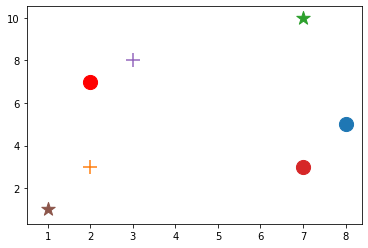

In [26]:
# 시각화(o= 과일, +=단밸질, *=채소
plt.scatter(8, 5, marker='o', s = 200)
plt.scatter(2, 3, marker='+', s = 200)   
plt.scatter(7, 10, marker='*', s = 200) 
plt.scatter(7, 3, marker='o', s = 200)
plt.scatter(3, 8, marker='+', s = 200)
plt.scatter(1, 1, marker='*', s = 200)
plt.scatter(dan, asac, color='red', s = 200) # 분류대상 -> B집단 

plt.show()
